### Laboratorium 3

In [1]:
#tablice wielowymiarowe w Julii
Asmall=[[1.0 2.0]; [3.0 0.0]]
Bsmall=[[1.0 -1.0]; [2.0 -2.0]]
size(Bsmall)
Asmall

2×2 Array{Float64,2}:
 1.0  2.0
 3.0  0.0

In [2]:
using Pkg
Pkg.add("LinearAlgebra")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  99.9 %0.0 %                            ]  29.1 %>                   ]  52.2 % [============================>            ]  68.9 %85.4 % Resolving package versions...
 Installed CodecZlib ─ v0.5.1
 Installed Parsers ─── v0.2.10
 Installed MbedTLS ─── v0.6.5
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [944b1d66] ↑ CodecZlib v0.5.0 ⇒ v0.5.1
  [739be429] ↑ MbedTLS v0.6.4 ⇒ v0.6.5
  [69de0a69] ↑ Parsers v0.2.9 ⇒ v0.2.10
  Building MbedTLS ──→ `~/.julia/packages/MbedTLS/eaAxb/deps/build.log`
  Building CodecZlib → `~/.julia/packages/CodecZlib/DAjXH/deps/build.log`


In [3]:
using LinearAlgebra.BLAS

In [2]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

naive_multiplication (generic function with 1 method)

In [3]:
#kompilacja
naive_multiplication(Asmall,Bsmall)

2×2 Array{Float64,2}:
 5.0  -5.0
 3.0  -3.0

In [4]:
#kompilacja funkcji BLASowej do mnożenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2×2 Array{Float64,2}:
 5.0  -5.0
 3.0  -3.0

In [5]:
A=rand(1000,1000);
B=rand(1000,1000);

In [6]:
# Należy pamiętać o "column-major" dostępie do tablic - 
# pierwszy indeks zmienia się szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
vec(A1)

4-element Array{Int64,1}:
 1
 3
 2
 4

In [7]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
#można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [8]:
@elapsed naive_multiplication(A,B)

3.465708656

In [9]:
println(@elapsed better_multiplication(A,B))
println(@elapsed naive_multiplication(A,B))

1.786273643
3.425410134


In [10]:
blas_times = [(@elapsed A * B) for i in 1:5]

5-element Array{Float64,1}:
 0.038367201
 0.036221483
 0.039840321
 0.034399278
 0.034011162

In [ ]:
blas_times = [(@elapsed A * B) for i in 1:5]

In [13]:
@elapsed A*B

0.075865584

In [22]:
using Pkg
Pkg.add("Polynomials")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed Polynomials ─ v0.5.1
  Updating `~/.julia/environments/v1.0/Project.toml`
  [f27b6e38] + Polynomials v0.5.1
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [f27b6e38] + Polynomials v0.5.1


In [24]:
# aproksymacja sredniokwadratowa wielomianem - tutaj przyklad dla wielomianu 3 stopnia
# pakiet Polynomials jest mozliwy do instalacji pod Juliabox
# https://github.com/JuliaMath/Polynomials.jl
using Polynomials
xs = 0:10; ys = map(x->exp(x), xs)
fit1=polyfit(xs, ys,3)


Poly(-1086.8658708490402 + 2905.5721994684973*x - 1082.7457238744728*x^2 + 100.44658880845468*x^3)

In [25]:
# obliczanie wartosci wielomianu 
fit1(1)

836.4071935534389

In [26]:
# obliczanie wartosci wielomianu (drugi sposób)
polyval(fit1, 1)

836.4071935534389

┌ Info: Recompiling stale cache file /home/mateusz/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1187


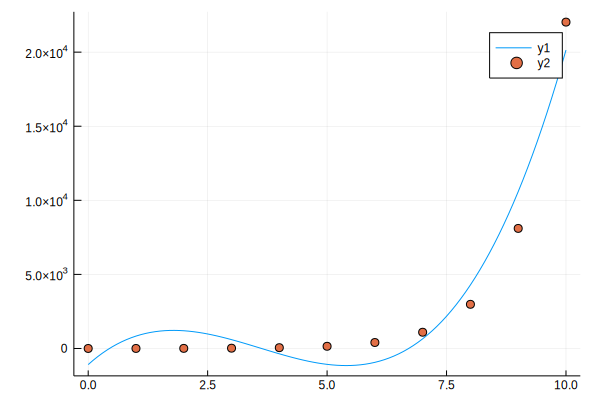

In [27]:
using Plots

# geste punkty do wyliczenia wartosci wielomianu aproksymujacego:
xd=0:0.1:10
# wykres wartosci wielomianu dla gestych punktow:
plot(xd,polyval(fit1, xd))

# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs,ys)


### Zadania
 
1.Uruchomić 
   - naive_multiplication(A,B), 
   - better_multiplication(A,B) 
   - mnożenie BLAS w Julii (A*B) 

dla coraz większych macierzy i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie.
 
2.Napisać w języku C:
    - naiwną metodę mnożenia macierzy (wersja 1) 
    - ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy (wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
    - skorzystać z  możliwości BLAS dostępnego w GSL(wersja 3). 
    
Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1). (Dla chętnych) sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu.

3.Użyć funkcji polyfit  z pakietu  Polynomials   do znalezienia odpowiednich wielomianow, ktore najlepiej pasują do zależności czasowych kazdego z algorytmow. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianow do wczesniejszych  wykresów.

4.Przedstawić wyniki dla języka Julia i C na wspólnym wykresie. Jaka metoda jest najszybsza? 


In [11]:
using DataFrames

In [12]:
sizes_small = (500, 750, 1000)
sizes_big = (1500, 2000, 2500, 3000, 3500)

(1500, 2000, 2500, 3000, 3500)

In [14]:
df = DataFrame(func = String[], size = Int32[], time = Float32[])

,func,size,time
,String,Int32,Float32


In [15]:
for s in sizes_small
    
    println(s)
    
    for i in 1:10
        
        println(i)
        push!(df, ["julia naive" s (@elapsed naive_multiplication(rand(s, s), rand(s, s)))])
        push!(df, ["julia better" s (@elapsed better_multiplication(rand(s, s), rand(s, s)))])
        push!(df, ["julia blas" s (@elapsed rand(s, s) * rand(s, s))])
        
    end
end

for s in sizes_big
    
    println(s)
    
    for i in 1:5
        
        println(i)
        push!(df, ["julia naive" s (@elapsed naive_multiplication(rand(s, s), rand(s, s)))])
        push!(df, ["julia better" s (@elapsed better_multiplication(rand(s, s), rand(s, s)))])
        push!(df, ["julia blas" s (@elapsed rand(s, s) * rand(s, s))])
    end
end

500
1
2
3
4
5
6
7
8
9
10
750
1
2
3
4
5
6
7
8
9
10
1000
1
2
3
4
5
6
7
8
9
10
1500
1
2
3
4
5
2000
1
2
3
4
5
2500
1
2
3
4
5
3000
1
2
3
4
5
3500
1
2
3
4
5


In [16]:
df

,func,size,time
,String,Int32,Float32
1,julia naive,500,0.419149
2,julia better,500,0.213123
3,julia blas,500,0.380658
4,julia naive,500,0.456218
5,julia better,500,0.217179
6,julia blas,500,0.00729024
7,julia naive,500,0.439931
8,julia better,500,0.209094
9,julia blas,500,0.00575121


In [18]:
using CSV

In [19]:
CSV.write("julia-times2.csv", df)

"julia-times2.csv"